In [2]:
# подключение библиотек
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import math as math
import seaborn as sns #
import matplotlib.pyplot as plt
import missingno as msno
import plotly.graph_objs as go
import plotly.express as px #
plt.style.use('seaborn-dark')
plt.style.context('grayscale')
%matplotlib inline
import re
from wordcloud import WordCloud, STOPWORDS

<ipython-input-2-8f63410a912b>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


In [3]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Sleep_Efficiency.csv')

Mounted at /content/drive


In [4]:
# replace null values with mean
df['Awakenings'].fillna(df['Awakenings'].mean(), inplace=True)
df['Caffeine consumption'].fillna(df['Caffeine consumption'].mean(), inplace=True)
df['Alcohol consumption'].fillna(df['Alcohol consumption'].mean(), inplace=True)
df['Exercise frequency'].fillna(df['Exercise frequency'].mean(), inplace=True)

In [5]:
# replace null values with mean
df['Awakenings'].fillna(df['Awakenings'].mean(), inplace=True)
df['Caffeine consumption'].fillna(df['Caffeine consumption'].mean(), inplace=True)
df['Alcohol consumption'].fillna(df['Alcohol consumption'].mean(), inplace=True)
df['Exercise frequency'].fillna(df['Exercise frequency'].mean(), inplace=True)
# checking for null values
df.isnull().sum()

ID                        0
Age                       0
Gender                    0
Bedtime                   0
Wakeup time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
dtype: int64

In [6]:
df.columns = [col.replace(' ', '_').lower() for col in df.columns]
print(df.columns)

Index(['id', 'age', 'gender', 'bedtime', 'wakeup_time', 'sleep_duration',
       'sleep_efficiency', 'rem_sleep_percentage', 'deep_sleep_percentage',
       'light_sleep_percentage', 'awakenings', 'caffeine_consumption',
       'alcohol_consumption', 'smoking_status', 'exercise_frequency'],
      dtype='object')


In [ ]:
df = df.drop(['id', 'bedtime', 'wakeup_time'], axis='columns')
df.head()

,age,gender,sleep_duration,sleep_efficiency,rem_sleep_percentage,deep_sleep_percentage,light_sleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,smoking_status,exercise_frequency
0,65,Female,6.0,0.88,18,70,10,0.0,0.0,0.0,Yes,3.0
1,69,Male,7.0,0.66,24,28,53,3.0,0.0,3.0,Yes,3.0
2,40,Female,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,40,Female,6.0,0.51,28,25,52,3.0,50.0,5.0,Yes,1.0
4,57,Male,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [ ]:
# 从 DataFrame 对象中提取特征矩阵 X
X_cate = df.loc[:, ['gender', 'smoking_status']]

# 查看特征矩阵的维度大小
print(X_cate.shape)

(452, 2)


In [ ]:
X_num = df.loc[:, ['age','sleep_duration','rem_sleep_percentage', 'deep_sleep_percentage',
       'light_sleep_percentage', 'awakenings', 'caffeine_consumption',
       'alcohol_consumption','exercise_frequency']]
print(X_num.shape)
print(X_num.head())

(452, 9)
   age  sleep_duration  rem_sleep_percentage  deep_sleep_percentage  \
0   65             6.0                    18                     70   
1   69             7.0                    24                     28   
2   40             8.0                    20                     70   
3   40             6.0                    28                     25   
4   57             8.0                    27                     55   

   light_sleep_percentage  awakenings  caffeine_consumption  \
0                      10         0.0                   0.0   
1                      53         3.0                   0.0   
2                      10         1.0                   0.0   
3                      52         3.0                  50.0   
4                      18         3.0                   0.0   

   alcohol_consumption  exercise_frequency  
0                  0.0                 3.0  
1                  3.0                 3.0  
2                  0.0                 3.0  
3    

# масштабирование признаков (не менее чем тремя способами);

## 1.Min-Max

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 创建特征缩放器对象
scaler = MinMaxScaler()

# 对特征矩阵进行缩放
X_num_scaled = scaler.fit_transform(X_num)


In [ ]:
import numpy as np

print("Mean of X_num_scaled:", np.mean(X_num_scaled, axis=0))
print("Standard deviation of X_num_scaled:", np.std(X_num_scaled, axis=0))
print("Minimum value of X_num_scaled:", np.min(X_num_scaled, axis=0))
print("Maximum value of X_num_scaled:", np.max(X_num_scaled, axis=0))


Mean of X_num_scaled: [ 1.24086187e-02 -3.42920354e-02  1.43173198e-01 -5.99133873e-01
  5.57702727e-01  3.20601852e-01 -3.92999301e-18  6.22706422e-01
 -6.95067265e-02]
Standard deviation of X_num_scaled: [0.57207264 0.86566573 0.56686698 1.32293529 1.23542896 0.66243491
 0.58642512 0.80606826 0.47234421]
Minimum value of X_num_scaled: [-1.34782609 -2.5        -1.         -3.40425532 -0.89795918 -0.5
 -0.47306792  0.         -0.66666667]
Maximum value of X_num_scaled: [1.26086957 2.5        1.14285714 1.27659574 3.10204082 1.5
 3.52693208 2.5        1.        ]


## 2.Z-Score

In [ ]:
from sklearn.preprocessing import StandardScaler

# 创建特征缩放器对象
scaler = StandardScaler()

# 对特征矩阵进行缩放
X_num_scaled = scaler.fit_transform(X_num)


In [ ]:
import numpy as np

print("Mean of X_num_scaled:", np.mean(X_num_scaled, axis=0))
print("Standard deviation of X_num_scaled:", np.std(X_num_scaled, axis=0))
print("Minimum value of X_num_scaled:", np.min(X_num_scaled, axis=0))
print("Maximum value of X_num_scaled:", np.max(X_num_scaled, axis=0))


Mean of X_num_scaled: [-4.91249126e-17 -2.90819483e-16 -1.19864787e-16  1.33619762e-16
 -4.71599161e-17 -2.20079608e-16 -7.85998602e-17 -7.85998602e-18
  0.00000000e+00]
Standard deviation of X_num_scaled: [1. 1. 1. 1. 1. 1. 1. 1. 1.]
Minimum value of X_num_scaled: [-2.37773074 -2.84833728 -2.0166516  -2.12037692 -1.17826436 -1.23876602
 -0.8066979  -0.77252319 -1.2642474 ]
Maximum value of X_num_scaled: [2.18234688 2.92756425 1.76352475 1.4178544  2.05947745 1.78039855
 6.01429225 2.32895114 2.26425286]


## 3.Robust Scaling

In [ ]:
from sklearn.preprocessing import RobustScaler

# 创建特征缩放器对象
scaler = RobustScaler()

# 对特征矩阵进行缩放
X_num_scaled = scaler.fit_transform(X_num)


In [ ]:
import numpy as np

print("Mean of X_num_scaled:", np.mean(X_num_scaled, axis=0))
print("Standard deviation of X_num_scaled:", np.std(X_num_scaled, axis=0))
print("Minimum value of X_num_scaled:", np.min(X_num_scaled, axis=0))
print("Maximum value of X_num_scaled:", np.max(X_num_scaled, axis=0))


Mean of X_num_scaled: [ 1.24086187e-02 -3.42920354e-02  1.43173198e-01 -5.99133873e-01
  5.57702727e-01  3.20601852e-01 -3.92999301e-18  6.22706422e-01
 -6.95067265e-02]
Standard deviation of X_num_scaled: [0.57207264 0.86566573 0.56686698 1.32293529 1.23542896 0.66243491
 0.58642512 0.80606826 0.47234421]
Minimum value of X_num_scaled: [-1.34782609 -2.5        -1.         -3.40425532 -0.89795918 -0.5
 -0.47306792  0.         -0.66666667]
Maximum value of X_num_scaled: [1.26086957 2.5        1.14285714 1.27659574 3.10204082 1.5
 3.52693208 2.5        1.        ]


# обработку выбросов для числовых признаков (по одному способу для удаления выбросов и для замены выбросов);

## 1.Удаление выбросов:
Выбросы можно обнаружить и удалить из числовых атрибутов с помощью среднего и стандартного отклонения. Если значение числового атрибута после масштабирования отличается от 2,5 стандартных отклонений, он может быть помечен как выброс и удален из набора данных.

Сначала мы вычисляем, превышает ли масштабированное значение каждого признака 2,5 стандартных отклонения, и создаем маску outlier_mask для определения всех значений, которые превышают 2,5 стандартных отклонения в масштабированном значении. Затем мы используем функцию all для вычисления маски для матрицы признаков и используем outlier_mask для удаления промахов из матрицы признаков.



In [ ]:
import numpy as np

# 计算每个特征在缩放后的值是否超过2.5个标准差
outlier_mask = (np.abs(X_num_scaled) < 2.5).all(axis=1)

# 从特征矩阵中删除异常值
X_num_cleaned = X_num_scaled[outlier_mask, :]

In [ ]:
print(X_num_cleaned[:5,:])

[[ 1.08695652 -1.5        -0.57142857  0.85106383 -0.65306122 -0.5
  -0.47306792  0.          0.33333333]
 [ 0.          0.5        -0.28571429  0.85106383 -0.65306122  0.
  -0.47306792  0.          0.33333333]
 [ 0.73913043  0.5         0.71428571 -0.42553191  0.          1.
  -0.47306792  1.5         0.33333333]
 [-0.17391304  0.          0.85714286  0.         -0.08163265 -0.5
   0.          0.         -0.33333333]
 [ 0.04347826 -1.5         0.85714286  0.         -0.08163265  1.
   0.52693208  0.         -0.33333333]]


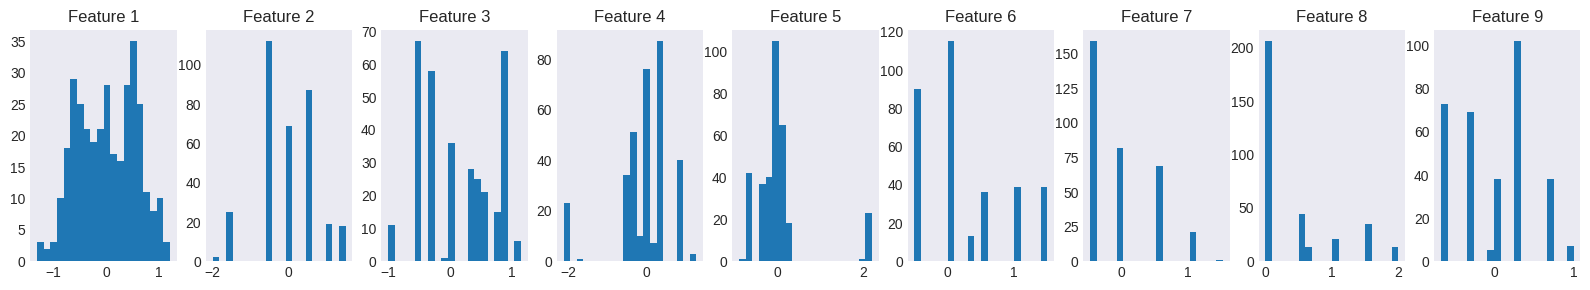

In [ ]:
fig, axs = plt.subplots(1, X_num_cleaned.shape[1], figsize=(20, 3))

for i in range(X_num_cleaned.shape[1]):
    axs[i].hist(X_num_cleaned[:, i], bins=20)
    axs[i].set_title("Feature " + str(i+1))

plt.show()

## 2.Замена выбросов:
С выбросами можно работать с помощью методов, основанных на интерполяции, таких как интерполяция среднего, интерполяция медианы, интерполяция K-ближайшего соседа и т.д. Например, мы можем использовать медиану для замены выбросов в числовых атрибутах.
В этом примере мы сначала импортировали класс SimpleImputer и создали объект интерполятора, используя стратегию медианы. Затем мы используем метод fit_transform для интерполяции медианы для значений выбросов в числовом атрибуте, сохраняя результат в X_num_imputed.

In [ ]:
from sklearn.impute import SimpleImputer

# 创建插补器对象
imputer = SimpleImputer(strategy='median')

# 使用中位数插补替换异常值
X_num_imputed = imputer.fit_transform(X_num)


In [ ]:
print(X_num_imputed[:5,:])

[[65.  6. 18. 70. 10.  0.  0.  0.  3.]
 [69.  7. 24. 28. 53.  3.  0.  3.  3.]
 [40.  8. 20. 70. 10.  1.  0.  0.  3.]
 [40.  6. 28. 25. 52.  3. 50.  5.  1.]
 [57.  8. 27. 55. 18.  3.  0.  3.  3.]]


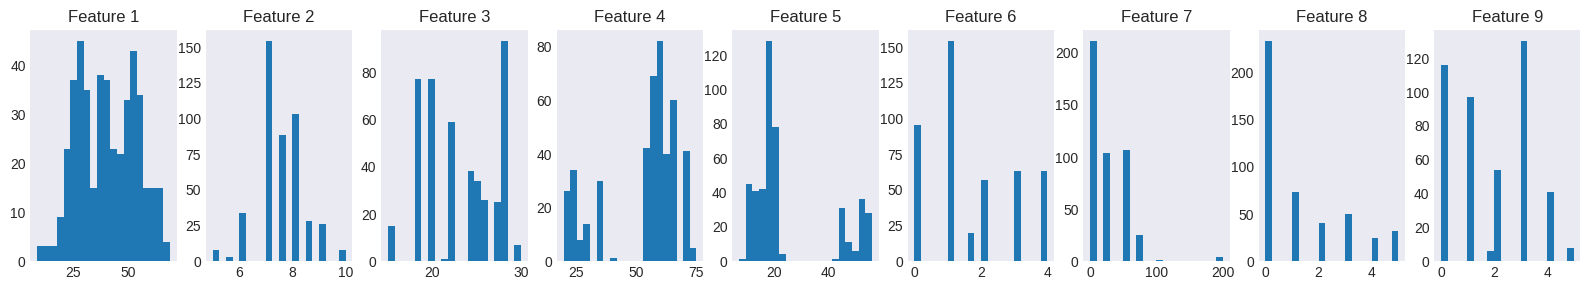

In [ ]:
# 使用matplotlib进行可视化
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, X_num_imputed.shape[1], figsize=(20, 3))

for i in range(X_num_imputed.shape[1]):
    axs[i].hist(X_num_imputed[:, i], bins=20)
    axs[i].set_title("Feature " + str(i+1))

plt.show()

# обработку по крайней мере одного нестандартного признака (который не является числовым или категориальным);

In [7]:
df.head()

,id,age,gender,bedtime,wakeup_time,sleep_duration,sleep_efficiency,rem_sleep_percentage,deep_sleep_percentage,light_sleep_percentage,awakenings,caffeine_consumption,alcohol_consumption,smoking_status,exercise_frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,10,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,24,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,28,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [10]:
X_t = df.loc[:, ['bedtime']]
print(X_t.head())

               bedtime
0  2021-03-06 01:00:00
1  2021-12-05 02:00:00
2  2021-05-25 21:30:00
3  2021-11-03 02:30:00
4  2021-03-13 01:00:00


In [11]:
X_t.dtypes

bedtime    object
dtype: object

In [14]:
X_t['bedtime'] = pd.to_datetime(X_t['bedtime'])
X_t.dtypes

bedtime    datetime64[ns]
dtype: object

## Выделение стандартных признаков даты и времени

In [16]:
# День
X_t['day'] = X_t['bedtime'].dt.day
# Месяц
X_t['month'] = X_t['bedtime'].dt.month
# Год
X_t['year'] = X_t['bedtime'].dt.year
# Часы
X_t['hour'] = X_t['bedtime'].dt.hour
#Минуты
X_t['minute'] = X_t['bedtime'].dt.minute
#Секунды
X_t['second'] = X_t['bedtime'].dt.second
#Неделя года
X_t['week'] = X_t['bedtime'].dt.isocalendar().week
#Квартал
X_t['quarter'] = X_t['bedtime'].dt.quarter
#День недели 
X_t['dayofweek'] = X_t['bedtime'].dt.dayofweek
#Выходной день
X_t['day_name'] = X_t['bedtime'].dt.day_name()
X_t['is_holiday'] = X_t.apply(lambda x: 1 if x['bedtime'].dayofweek in [5,6] else 0, axis=1)

In [17]:
X_t.head()

,bedtime,day,month,year,hour,minute,second,week,quarter,dayofweek,day_name,is_holiday
0,2021-03-06 01:00:00,6,3,2021,1,0,0,9,1,5,Saturday,1
1,2021-12-05 02:00:00,5,12,2021,2,0,0,48,4,6,Sunday,1
2,2021-05-25 21:30:00,25,5,2021,21,30,0,21,2,1,Tuesday,0
3,2021-11-03 02:30:00,3,11,2021,2,30,0,44,4,2,Wednesday,0
4,2021-03-13 01:00:00,13,3,2021,1,0,0,10,1,5,Saturday,1


In [19]:
from sklearn.preprocessing import MinMaxScaler
# Создадим масштабируемые признаки для дальнейших экспериментов
dt_features = ['year', 'day', 'month', 'hour', 'minute', 'second', 'week', 'quarter', 'dayofweek']
dt_features_scaled = []
for f in dt_features:
    f_new = str(f + '_scaled')
    dt_features_scaled.append(f_new)
    X_t[f_new] = MinMaxScaler().fit_transform(X_t[[f]])
dt_features_scaled

['year_scaled',
 'day_scaled',
 'month_scaled',
 'hour_scaled',
 'minute_scaled',
 'second_scaled',
 'week_scaled',
 'quarter_scaled',
 'dayofweek_scaled']

In [21]:
X_t.head()

,bedtime,day,month,year,hour,minute,second,week,quarter,dayofweek,...,is_holiday,year_scaled,day_scaled,month_scaled,hour_scaled,minute_scaled,second_scaled,week_scaled,quarter_scaled,dayofweek_scaled
0,2021-03-06 01:00:00,6,3,2021,1,0,0,9,1,5,...,1,0.0,0.166667,0.181818,0.043478,0.0,0.0,0.153846,0.000000,0.833333
1,2021-12-05 02:00:00,5,12,2021,2,0,0,48,4,6,...,1,0.0,0.133333,1.000000,0.086957,0.0,0.0,0.903846,1.000000,1.000000
2,2021-05-25 21:30:00,25,5,2021,21,30,0,21,2,1,...,0,0.0,0.800000,0.363636,0.913043,1.0,0.0,0.384615,0.333333,0.166667
3,2021-11-03 02:30:00,3,11,2021,2,30,0,44,4,2,...,0,0.0,0.066667,0.909091,0.086957,1.0,0.0,0.826923,1.000000,0.333333
4,2021-03-13 01:00:00,13,3,2021,1,0,0,10,1,5,...,1,0.0,0.400000,0.181818,0.043478,0.0,0.0,0.173077,0.000000,0.833333


## Временные интервалы

In [24]:
import datetime
# Разница между датами 
X_t['now'] = datetime.datetime.today()
X_t['diff'] = X_t['now'] - X_t['bedtime']
X_t.dtypes

bedtime              datetime64[ns]
day                           int64
month                         int64
year                          int64
hour                          int64
minute                        int64
second                        int64
week                         UInt32
quarter                       int64
dayofweek                     int64
day_name                     object
is_holiday                    int64
year_scaled                 float64
day_scaled                  float64
month_scaled                float64
hour_scaled                 float64
minute_scaled               float64
second_scaled               float64
week_scaled                 float64
quarter_scaled              float64
dayofweek_scaled            float64
now                  datetime64[ns]
diff                timedelta64[ns]
dtype: object

In [25]:
X_t.head()

,bedtime,day,month,year,hour,minute,second,week,quarter,dayofweek,...,day_scaled,month_scaled,hour_scaled,minute_scaled,second_scaled,week_scaled,quarter_scaled,dayofweek_scaled,now,diff
0,2021-03-06 01:00:00,6,3,2021,1,0,0,9,1,5,...,0.166667,0.181818,0.043478,0.0,0.0,0.153846,0.000000,0.833333,2023-06-10 22:35:34.697827,826 days 21:35:34.697827
1,2021-12-05 02:00:00,5,12,2021,2,0,0,48,4,6,...,0.133333,1.000000,0.086957,0.0,0.0,0.903846,1.000000,1.000000,2023-06-10 22:35:34.697827,552 days 20:35:34.697827
2,2021-05-25 21:30:00,25,5,2021,21,30,0,21,2,1,...,0.800000,0.363636,0.913043,1.0,0.0,0.384615,0.333333,0.166667,2023-06-10 22:35:34.697827,746 days 01:05:34.697827
3,2021-11-03 02:30:00,3,11,2021,2,30,0,44,4,2,...,0.066667,0.909091,0.086957,1.0,0.0,0.826923,1.000000,0.333333,2023-06-10 22:35:34.697827,584 days 20:05:34.697827
4,2021-03-13 01:00:00,13,3,2021,1,0,0,10,1,5,...,0.400000,0.181818,0.043478,0.0,0.0,0.173077,0.000000,0.833333,2023-06-10 22:35:34.697827,819 days 21:35:34.697827


In [26]:
# Чтобы получить разницу между датами в заданных единицах 
# (минутах, днях и т.д.) нужно разделить timedelta64 на длительность
X_t['diff_days']=X_t['diff']/np.timedelta64(1,'D')
X_t.dtypes

bedtime              datetime64[ns]
day                           int64
month                         int64
year                          int64
hour                          int64
minute                        int64
second                        int64
week                         UInt32
quarter                       int64
dayofweek                     int64
day_name                     object
is_holiday                    int64
year_scaled                 float64
day_scaled                  float64
month_scaled                float64
hour_scaled                 float64
minute_scaled               float64
second_scaled               float64
week_scaled                 float64
quarter_scaled              float64
dayofweek_scaled            float64
now                  datetime64[ns]
diff                timedelta64[ns]
diff_days                   float64
dtype: object

In [27]:
X_t.head()

,bedtime,day,month,year,hour,minute,second,week,quarter,dayofweek,...,month_scaled,hour_scaled,minute_scaled,second_scaled,week_scaled,quarter_scaled,dayofweek_scaled,now,diff,diff_days
0,2021-03-06 01:00:00,6,3,2021,1,0,0,9,1,5,...,0.181818,0.043478,0.0,0.0,0.153846,0.000000,0.833333,2023-06-10 22:35:34.697827,826 days 21:35:34.697827,826.899707
1,2021-12-05 02:00:00,5,12,2021,2,0,0,48,4,6,...,1.000000,0.086957,0.0,0.0,0.903846,1.000000,1.000000,2023-06-10 22:35:34.697827,552 days 20:35:34.697827,552.858040
2,2021-05-25 21:30:00,25,5,2021,21,30,0,21,2,1,...,0.363636,0.913043,1.0,0.0,0.384615,0.333333,0.166667,2023-06-10 22:35:34.697827,746 days 01:05:34.697827,746.045540
3,2021-11-03 02:30:00,3,11,2021,2,30,0,44,4,2,...,0.909091,0.086957,1.0,0.0,0.826923,1.000000,0.333333,2023-06-10 22:35:34.697827,584 days 20:05:34.697827,584.837207
4,2021-03-13 01:00:00,13,3,2021,1,0,0,10,1,5,...,0.181818,0.043478,0.0,0.0,0.173077,0.000000,0.833333,2023-06-10 22:35:34.697827,819 days 21:35:34.697827,819.899707


## Отображение на круг

In [28]:
def round_code(v, T, cos_flag = True):
    x = 2*np.pi*v/T
    if cos_flag:
        return np.cos(x)
    else:
        return np.sin(x)

In [29]:
# Опеределим периоды для признаков
for f in dt_features:
    print(f, X_t[f].min(), X_t[f].max())

year 2021 2021
day 1 31
month 1 12
hour 0 23
minute 0 30
second 0 0
week 1 53
quarter 1 4
dayofweek 0 6


In [30]:
# периоды для признаков
dt_features_periods = [0, 31, 12, 24, 60, 60, 52, 4, 7]

In [31]:
X_t['year_round'] = X_t.apply(lambda x: 1 if x['year']==2021 else 0, axis=1)
dt_features_round = ['year_round']

In [32]:
X_t.head()

,bedtime,day,month,year,hour,minute,second,week,quarter,dayofweek,...,hour_scaled,minute_scaled,second_scaled,week_scaled,quarter_scaled,dayofweek_scaled,now,diff,diff_days,year_round
0,2021-03-06 01:00:00,6,3,2021,1,0,0,9,1,5,...,0.043478,0.0,0.0,0.153846,0.000000,0.833333,2023-06-10 22:35:34.697827,826 days 21:35:34.697827,826.899707,1
1,2021-12-05 02:00:00,5,12,2021,2,0,0,48,4,6,...,0.086957,0.0,0.0,0.903846,1.000000,1.000000,2023-06-10 22:35:34.697827,552 days 20:35:34.697827,552.858040,1
2,2021-05-25 21:30:00,25,5,2021,21,30,0,21,2,1,...,0.913043,1.0,0.0,0.384615,0.333333,0.166667,2023-06-10 22:35:34.697827,746 days 01:05:34.697827,746.045540,1
3,2021-11-03 02:30:00,3,11,2021,2,30,0,44,4,2,...,0.086957,1.0,0.0,0.826923,1.000000,0.333333,2023-06-10 22:35:34.697827,584 days 20:05:34.697827,584.837207,1
4,2021-03-13 01:00:00,13,3,2021,1,0,0,10,1,5,...,0.043478,0.0,0.0,0.173077,0.000000,0.833333,2023-06-10 22:35:34.697827,819 days 21:35:34.697827,819.899707,1


In [33]:
%%time
# Построим отображение признаков на круг, год пропускаем
for f,p in zip(dt_features[1:], dt_features_periods[1:]):
    f_cos = str(f + '_cos')
    f_sin = str(f + '_sin')
    X_t[f_cos] = X_t.apply(lambda x: round_code(x[f], p), axis=1)
    X_t[f_sin] = X_t.apply(lambda x: round_code(x[f], p, False), axis=1)
    dt_features_round.append(f_cos)
    dt_features_round.append(f_sin)
dt_features_round   

CPU times: user 194 ms, sys: 238 µs, total: 194 ms
Wall time: 277 ms


['year_round',
 'day_cos',
 'day_sin',
 'month_cos',
 'month_sin',
 'hour_cos',
 'hour_sin',
 'minute_cos',
 'minute_sin',
 'second_cos',
 'second_sin',
 'week_cos',
 'week_sin',
 'quarter_cos',
 'quarter_sin',
 'dayofweek_cos',
 'dayofweek_sin']

In [34]:
X_t.head()

,bedtime,day,month,year,hour,minute,second,week,quarter,dayofweek,...,minute_cos,minute_sin,second_cos,second_sin,week_cos,week_sin,quarter_cos,quarter_sin,dayofweek_cos,dayofweek_sin
0,2021-03-06 01:00:00,6,3,2021,1,0,0,9,1,5,...,1.0,0.000000e+00,1.0,0.0,0.464723,0.885456,6.123234e-17,1.000000e+00,-0.222521,-0.974928
1,2021-12-05 02:00:00,5,12,2021,2,0,0,48,4,6,...,1.0,0.000000e+00,1.0,0.0,0.885456,-0.464723,1.000000e+00,-2.449294e-16,0.623490,-0.781831
2,2021-05-25 21:30:00,25,5,2021,21,30,0,21,2,1,...,-1.0,5.665539e-16,1.0,0.0,-0.822984,0.568065,-1.000000e+00,1.224647e-16,0.623490,0.781831
3,2021-11-03 02:30:00,3,11,2021,2,30,0,44,4,2,...,-1.0,5.665539e-16,1.0,0.0,0.568065,-0.822984,1.000000e+00,-2.449294e-16,-0.222521,0.974928
4,2021-03-13 01:00:00,13,3,2021,1,0,0,10,1,5,...,1.0,0.000000e+00,1.0,0.0,0.354605,0.935016,6.123234e-17,1.000000e+00,-0.222521,-0.974928


# отбор признаков:

In [ ]:
# 将所有字符串类型的特征进行独热编码
from sklearn.feature_selection import VarianceThreshold

# 将gender, smoking_status进行特征转换
gender_new = pd.Series(df['gender'].replace({'Male': 0, 'Female': 1}), name='gender_new')
smoking_status_new = pd.Series(df['smoking_status'].replace({'Yes': 0, 'No': 1}), name='smoking_status_new')

# 创建新的X_tFrame对象并与原始数据拼接
df_new = pd.concat([df, gender_new, smoking_status_new], axis=1)

X= df_new.loc[:, ['gender_new', 'smoking_status_new', 'age', 'sleep_duration', 'caffeine_consumption',
       'alcohol_consumption','exercise_frequency']]
print(X.shape)
y = df_new.loc[:, 'sleep_efficiency']
print(y.shape)

(452, 7)
(452,)


## 1.один метод из группы методов фильтрации (filter methods);

Метод отбора по дисперсии, метод отбора по дисперсии может быть использован для отбора признаков путем удаления признаков с малой дисперсией

In [ ]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.1)  # 方差阈值为0.1，即删除方差小于0.1的特征
X_new = selector.fit_transform(X)  # 进行特征选择


In [ ]:
# 创建特征矩阵的列名列表
features = ['feature_{}'.format(i) for i in range(X_new.shape[1])]

# 将选择后的特征矩阵Datanew转化为DataFrame对象
df_X_new = pd.DataFrame(X_new, columns=features)

# 查看选择后的特征矩阵X_new
print(df_X_new.head())

# # 可视化选择后的特征矩阵X_new
# import seaborn as sns

# sns.pairplot(df_X_new)


   feature_0  feature_1  feature_2  feature_3  feature_4
0        0.0       65.0        6.0        0.0        3.0
1        0.0       69.0        7.0        3.0        3.0
2        1.0       40.0        8.0        0.0        3.0
3        0.0       40.0        6.0        5.0        1.0
4        1.0       57.0        8.0        3.0        3.0


## 2.один метод из группы методов обертывания (wrapper methods);

Рекурсивное устранение признаков (RFE) - это метод отбора признаков на основе модели, который можно использовать для постепенного устранения признаков путем обучения модели и последующего выбора оптимального подмножества признаков. Мы использовали модуль RFE библиотеки scikit-learn, задали базовую модель в виде случайного леса и выбрали количество признаков для отбора (т.е. 5 признаков).

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

estimator = RandomForestRegressor(n_estimators=50, random_state=0)  # 利用随机森林作为基础模型
selector = RFE(estimator, n_features_to_select=5, step=1)  # 选择5个特征
X_new = selector.fit_transform(X, y)  # 进行特征选择


In [ ]:
# 创建特征矩阵的列名列表
features = ['feature_{}'.format(i) for i in range(X_new.shape[1])]

# 将选择后的特征矩阵X_new转化为DataFrame对象
df_X_new = pd.DataFrame(X_new, columns=features)

# 查看选择后的特征矩阵X_new
print(df_X_new.head())


   feature_0  feature_1  feature_2  feature_3  feature_4
0        0.0       65.0        6.0        0.0        3.0
1        0.0       69.0        7.0        3.0        3.0
2        1.0       40.0        8.0        0.0        3.0
3        0.0       40.0        6.0        5.0        1.0
4        1.0       57.0        8.0        3.0        3.0


## 3.один метод из группы методов вложений (embedded methods).

Выбор признаков на основе дерева - это метод встраивания, при котором древовидная модель может быть обучена для выбора оптимального подмножества признаков. Базовая модель задается в виде случайного леса, а для отбираемых признаков выбирается порог важности, т.е. признаки со средней важностью, превышающей это значение, сохраняются.

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

estimator = RandomForestRegressor(n_estimators=50, random_state=0)  # 利用随机森林作为基础模型
selector = SelectFromModel(estimator, threshold='mean')  # 选择平均重要性大于该值的特征
X_new = selector.fit_transform(X, y)  # 进行特征选择


In [ ]:
# 创建特征矩阵的列名列表
features = ['feature_{}'.format(i) for i in range(X_new.shape[1])]

# 将选择后的特征矩阵X_new转化为DataFrame对象
df_X_new = pd.DataFrame(X_new, columns=features)

# 查看选择后的特征矩阵X_new
print(df_X_new.head())

   feature_0  feature_1  feature_2
0        0.0       65.0        0.0
1        0.0       69.0        3.0
2        1.0       40.0        0.0
3        0.0       40.0        5.0
4        1.0       57.0        3.0
